In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt

## Get the data from csv file

In [3]:
from pandas import read_csv

# The dataframe containing all data in csv file
df = read_csv('../../datasets/StudentsPerformance.csv')

# take a general look at data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
df.head(9)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67


In [5]:
# The features to use, I don't need to use all features by now
cdf = df[['writing score', 'reading score', 'math score']]

# Now, the data is more simple
cdf.head(9)

,writing score,reading score,math score
0,74,72,72
1,88,90,69
2,93,95,90
3,44,57,47
4,75,78,76
5,78,83,71
6,92,95,88
7,39,43,40
8,67,64,64


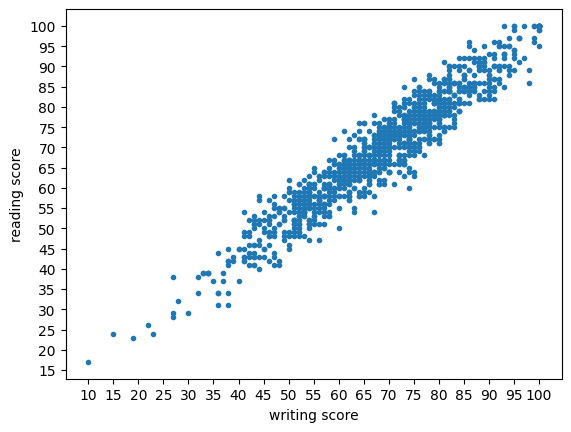

In [6]:
# The x axis name and data
xax = "writing score"

# The y axis name and data
yax = "reading score"

pltx = cdf[xax].values
plty = cdf[yax].values

plt.xticks(range(0, 105, 5))
plt.xlabel(xax)
           
plt.yticks(range(0, 105, 5))
plt.ylabel(yax)
           
plt.plot(pltx, plty, '.')
plt.show()

In [7]:
msk = np.random.rand(len(pltx)) < 0.8
training_data = cdf[msk]
testing_data = cdf[~msk]

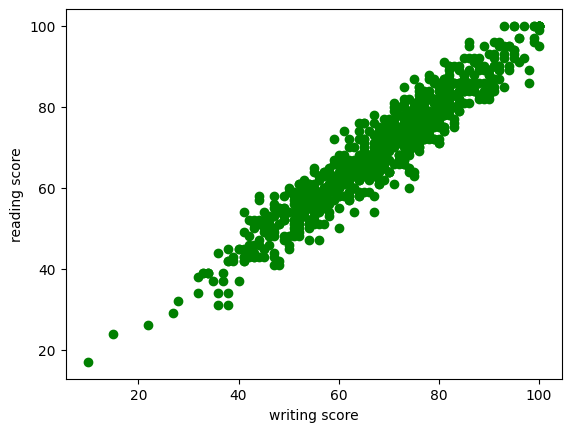

In [8]:
plt.scatter(training_data['writing score'], training_data['reading score'], color='green')
plt.xlabel('writing score')
plt.ylabel('reading score')
plt.show()

In [9]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(training_data['reading score'])
train_y = np.asanyarray(training_data['writing score'])

train_x = train_x.reshape(-1, 1)
train_y = train_y.reshape(-1, 1)

regr.fit(train_x, train_y)

print('Coefficionts', regr.coef_)
print('Intercept', regr.intercept_)

Coefficionts [[0.99460938]]
Intercept [-0.74488418]


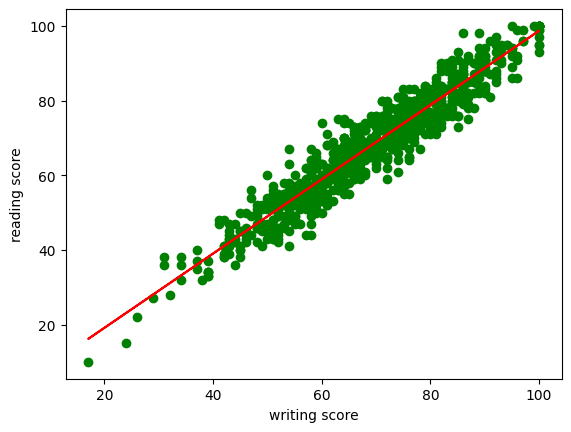

In [10]:
plt.scatter(train_x, train_y, color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x+regr.intercept_[0], '-r')
plt.xlabel('writing score')
plt.ylabel('reading score')
plt.show()

In [11]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(training_data['writing score']).reshape(-1, 1)
test_y = np.asanyarray(training_data['reading score']).reshape(-1, 1)
test_y_ = regr.predict(test_x)
print(r2_score(test_y, test_y_))

0.8820683631913391


[[44.05242974]]
